<a href="https://colab.research.google.com/github/tsengcc2023/Financial-Big-Data-Analysis/blob/main/week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 資料前處理

In [ ]:
pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=cd2e3f3f8873f4e0f79a9e1647185c912b5c95355fb2e8ad39a0321071dca6f1
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 3.7 MB/s eta 0:00:00


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.font_manager import fontManager
import wget

# 下載數據
start = dt.datetime(2004, 1, 1)
end = dt.datetime(2024, 9, 30)
ticker = '2330.TW'
data = yf.download(ticker, start=start, end=end)

# 前處理數據
data = data.fillna(method='ffill')
data_close = data[['Close']]

# 標準化
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_close)

# 設定 N 日後預測
N = 30
X, y = [], []
for i in range(len(data_scaled) - N):
    X.append(data_scaled[i:i+N])
    y.append(data_scaled[i+N])

X, y = np.array(X), np.array(y)

# 劃分訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print("訓練集大小:", X_train.shape, y_train.shape)
print("測試集大小:", X_test.shape, y_test.shape)

[*********************100%***********************]  1 of 1 completed

訓練集大小: (4073, 30, 1) (4073, 1)
測試集大小: (1019, 30, 1) (1019, 1)



<ipython-input-17-46ea401248e6>:19: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


# 作業1：使用 TensorFlow 或 PyTorch 實作類神經網路模型預測股票價格
#（TensorFlow 使用 Dense layer；PyTorch 使用 Linear layer）。

說明：使用收盤價或技術指標預測，預測N日後的股價。

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# 建立 DNN 模型
model = Sequential([
    Dense(64, activation='relu', input_shape=(N,)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # 輸出層，預測未來股價
])

model.compile(optimizer='adam', loss='mse')
model.summary()

# 訓練模型
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# 評估模型
loss = model.evaluate(X_test, y_test)
print("測試集 MSE:", loss)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,097 (16.00 KB)

 Trainable params: 4,097 (16.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0122 - val_loss: 0.0070
Epoch 2/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.1852e-04 - val_loss: 0.0083
Epoch 3/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.6638e-04 - val_loss: 0.0122
Epoch 4/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2695e-04 - val_loss: 0.0096
Epoch 5/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0170e-04 - val_loss: 0.0097
Epoch 6/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0445e-04 - val_loss: 0.0101
Epoch 7/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.8897e-05 - val_loss: 0.0074
Epoch 8/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.9450e-05 - val_loss: 0.0106
Epoch 9/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.7739e-05 - val_loss: 0.0098
Epoch 10/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.0068e-05 - val_loss: 0.0134
Epoch 11/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.0682e-05 - val_loss: 0.0109
Epoch 12/50


128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


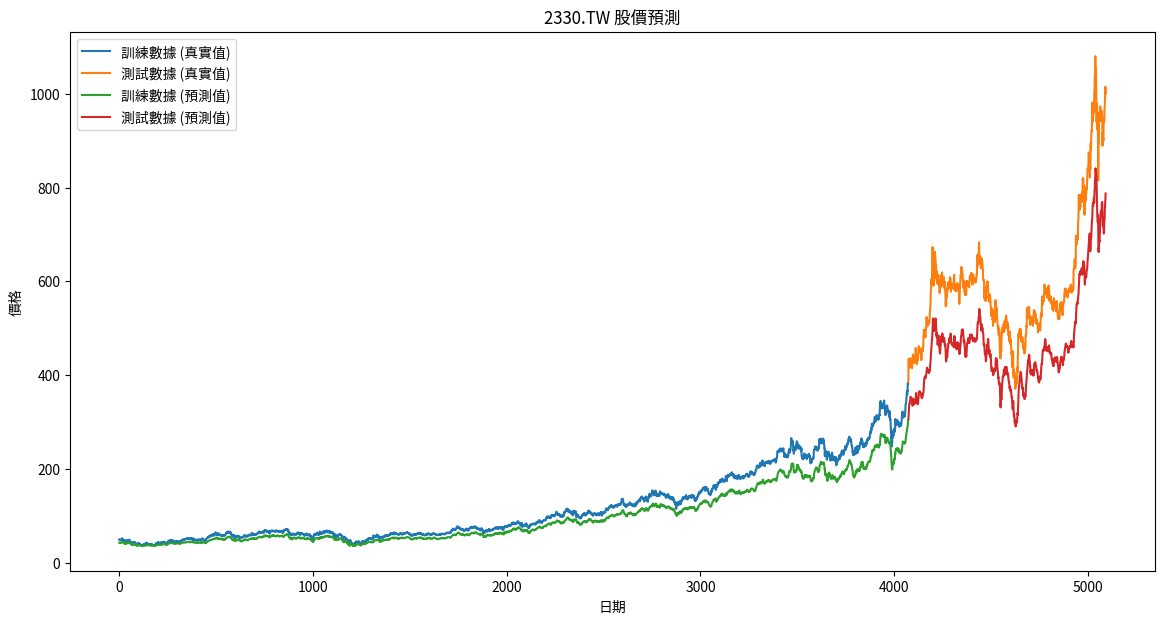

In [ ]:
wget.download("https://github.com/GrandmaCan/ML/raw/main/Resgression/ChineseFont.ttf")

# 將下載的中文字體引入到 matplotlib 的字體管理
fontManager.addfont("ChineseFont.ttf")
mpl.rc('font', family="ChineseFont")  # 設定 matplotlib 使用此字體

# 預測股價
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# 將標準化結果反轉
train_pred = scaler.inverse_transform(train_pred)
test_pred = scaler.inverse_transform(test_pred)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# 繪圖
plt.figure(figsize=(14, 7))
plt.plot(range(len(y_train_actual)), y_train_actual, label='訓練數據 (真實值)')
plt.plot(range(len(y_train_actual), len(y_train_actual) + len(y_test_actual)), y_test_actual, label='測試數據 (真實值)')
plt.plot(range(len(y_train_actual)), train_pred, label='訓練數據 (預測值)')
plt.plot(range(len(y_train_actual), len(y_train_actual) + len(y_test_actual)), test_pred, label='測試數據 (預測值)')
plt.title("2330.TW 股價預測")
plt.xlabel("日期")
plt.ylabel("價格")
plt.legend()
plt.show()

#作業2：使用 TensorFlow 或 PyTorch 實作 CNN 捕捉 K 線趨勢，並預測股價漲跌（分類任務）。

說明：輸入一張 N 天的 K 線圖判斷未來價格可能漲或跌，label 方式可以使用技術指標輔助，例如：5日均線高於10日均線標註「漲」，5日均線低於10日均線標註「跌」。

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.font_manager import fontManager
import wget

stock_id = '2330.tw'

# 下載數據
start = dt.datetime(2024, 1, 1)
end = dt.datetime(2024, 6, 30)
ticker = '2330.TW'

stock_data = yf.download(stock_id, start=start, end=end).reset_index()
# 將日期欄位設為索引
stock_data.set_index("Date", inplace=True)

# 刪除 Ticker 欄位並取代
stock_data.columns = stock_data.columns.droplevel('Ticker')

# 改變日期格式
stock_data.index = stock_data.index.strftime('%Y-%m-%d')

stock_data.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2024-01-02,585.361023,593.0,593.0,589.0,590.0,26059058
2024-01-03,570.554260,578.0,585.0,576.0,584.0,37106763
2024-01-04,572.528442,580.0,581.0,577.0,580.0,15309129
2024-01-05,568.580017,576.0,580.0,574.0,578.0,18158971
2024-01-08,575.489868,583.0,585.0,579.0,582.0,17761275


In [ ]:
from PIL import Image  # 處理圖像資料
import random  # 隨機
import os  # 系統檔，讀取資料使用
import mplfinance as mpf
import pandas as pd

window_size = 30  # K線圖的時間窗口

# 定義短期和長期均線的週期
short_window = 5  # 短期均線
long_window = 20  # 長期均線

# K線圖保存的文件夹
output_dir = 'k_line_images'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# 儲存標籤
labels = []
file_names = []

# 片利數據並生成標籤和 K 線圖
for i in range(len(stock_data) - window_size):
    window_data = stock_data.iloc[i:i + window_size].copy()  # 當前 K 線圖窗口

    # 確保 index 是 DatetimeIndex
    window_data.index = pd.to_datetime(window_data.index)

    # 計算短期均線和長期均線
    short_ma = window_data['Close'].rolling(window=short_window).mean().iloc[-1]
    long_ma = window_data['Close'].rolling(window=long_window).mean().iloc[-1]

    print(f'窗口{i}的短期均線: {short_ma}, 長期均線: {long_ma}, 標記為', end='')

    # 判斷漲跌：短期均線高於長期均線則標記為漲，否則標記為跌
    if short_ma > long_ma:
        labels.append(1)  # 漲
        print('「漲」: 1')
    else:
        labels.append(0)  # 跌
        print('「跌」: 0')

    print('\n--------------------------------\n')

    # 生成文件名
    file_name = f'k_line_{i}.png'
    file_names.append(file_name)

    # 保存 K 線圖
    mpf.plot(window_data, type='candle', style='charles', axisoff=True,
             figsize=(15, 6), savefig=os.path.join(output_dir, file_name))

# 保存標籤到 CSV 文件中
labels_df = pd.DataFrame({
    'file_name': file_names,
    'label': labels
})

labels_df.to_csv('labels.csv', index=False)

窗口0的短期均線: 685.2, 長期均線: 639.75, 標記為「漲」: 1

--------------------------------

窗口1的短期均線: 684.2, 長期均線: 645.35, 標記為「漲」: 1

--------------------------------

窗口2的短期均線: 687.0, 長期均線: 651.15, 標記為「漲」: 1

--------------------------------

窗口3的短期均線: 691.0, 長期均線: 656.65, 標記為「漲」: 1

--------------------------------

窗口4的短期均線: 693.2, 長期均線: 660.25, 標記為「漲」: 1

--------------------------------

窗口5的短期均線: 695.0, 長期均線: 663.45, 標記為「漲」: 1

--------------------------------

窗口6的短期均線: 694.4, 長期均線: 666.5, 標記為「漲」: 1

--------------------------------

窗口7的短期均線: 700.0, 長期均線: 671.4, 標記為「漲」: 1

--------------------------------

窗口8的短期均線: 706.4, 長期均線: 675.8, 標記為「漲」: 1

--------------------------------

窗口9的短期均線: 713.8, 長期均線: 680.35, 標記為「漲」: 1

--------------------------------

窗口10的短期均線: 727.8, 長期均線: 685.95, 標記為「漲」: 1

--------------------------------

窗口11的短期均線: 746.8, 長期均線: 693.05, 標記為「漲」: 1

--------------------------------

窗口12的短期均線: 755.0, 長期均線: 699.95, 標記為「漲」: 1

--------------------------------

窗口13的短期均線: 7

In [ ]:
labels_df['label'].value_counts()

,count
label,
1,75
0,12


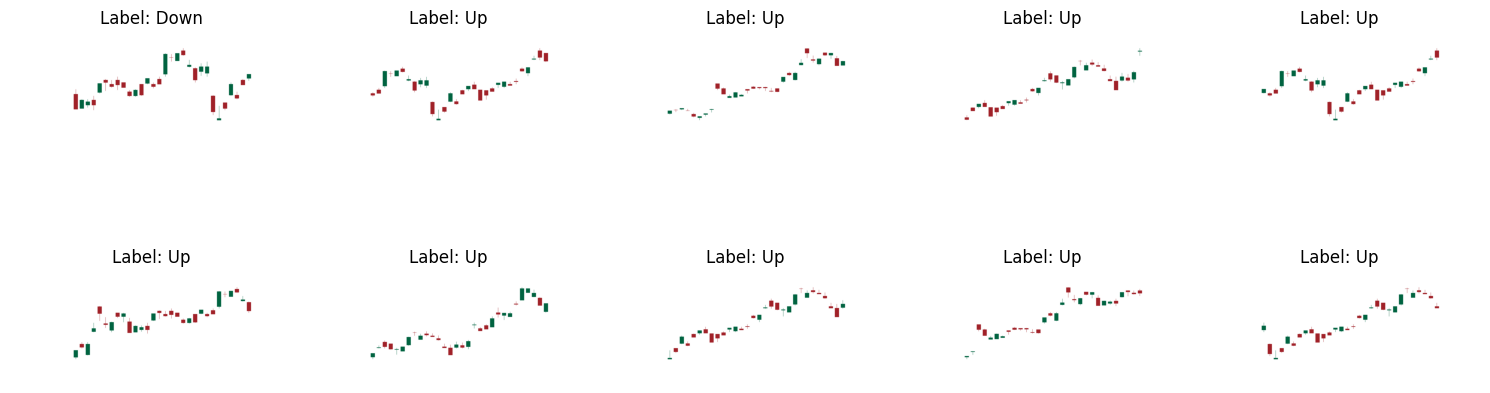

In [ ]:
# 載入 CSV label檔案
output_dir = 'k_line_images'
labels_df = pd.read_csv('labels.csv', dtype={'label': str})

# 隨機選10張圖
random_indices = random.sample(range(len(labels_df)), 10)
selected_images = labels_df.iloc[random_indices]

# 設定 2*5 畫布
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

# 將圖放進畫布中
for i, (index, row) in enumerate(selected_images.iterrows()):
    img_path = os.path.join(output_dir, row['file_name'])
    img = Image.open(img_path)
    ax = axes[i // 5, i % 5]
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f"Label: {'Up' if row['label'] == '1' else 'Down'}")

plt.tight_layout()
plt.show()

In [ ]:
# 用於資料集拆分訓練、驗證、測試
from sklearn.model_selection import train_test_split

# 先從原始資料中切分出測試集 (20%)
train_df, test_df = train_test_split(labels_df, test_size=0.2, stratify=labels_df['label'], random_state=42)

# 然後再把訓練集劃分成訓練集與驗證集 (80% 訓練，20% 驗證)
train_df, val_df = train_test_split(train_df, test_size=0.2, stratify=train_df['label'], random_state=42)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# K線圖位置路徑
image_dir = 'k_line_images/'

# 建立資料集生成器
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,     # 隨機選轉
    width_shift_range=0.1,  # 水平平移
    height_shift_range=0.1, # 垂直平移
    zoom_range=0.1,         # 隨機縮放
    horizontal_flip=True,   # 水平翻轉
    validation_split=0.2)   # 20% 當驗證集

In [ ]:
# 訓練集生成器
train_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=image_dir,
    x_col="file_name",
    y_col="label",
    target_size=(150, 150),
    batch_size=8,
    class_mode='binary'
)

# 驗證集生成器
validation_generator = datagen.flow_from_dataframe(
    dataframe=val_df,
    directory=image_dir,
    x_col="file_name",
    y_col="label",
    target_size=(150, 150),
    batch_size=8,
    class_mode='binary'
)

# 測試集生成器（注意這裡不進行資料增強）
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=image_dir,
    x_col="file_name",
    y_col="label",
    target_size=(150, 150),
    batch_size=8,
    class_mode='binary',
    shuffle=False  # 測試集不需要隨機打亂
)

Found 55 validated image filenames belonging to 2 classes.
Found 14 validated image filenames belonging to 2 classes.
Found 18 validated image filenames belonging to 2 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential # 模型容器
from tensorflow.keras.layers import (
    Input, # 輸入層
    Conv2D,  # 卷積層
    MaxPooling2D, # 最大池化層
    Flatten, # 展平層
    Dense, # 全連接層
    LeakyReLU, # 避免梯度消失
    Dropout, # 避免過擬合
    BatchNormalization # 批次正規化
)
from tensorflow.keras.optimizers import Adam # 模型優化器
from tensorflow.keras.callbacks import ReduceLROnPlateau # 動態調整學習率

# 設定學習率動態調整
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

# 建立模型容器
model = Sequential()

model.add(Input(shape=(150, 150, 3)))

# 第一層卷積層 + 批次歸一化 + LeakyReLU + 最大池化
model.add(Conv2D(32, (5, 5)))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(MaxPooling2D((2, 2)))

# 第二層卷積層 + 批次歸一化 + LeakyReLU + 最大池化
model.add(Conv2D(64, (5, 5)))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(MaxPooling2D((2, 2)))

# 第三層卷積層 + 批次歸一化 + LeakyReLU + 最大池化
model.add(Conv2D(128, (3, 3)))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(MaxPooling2D((2, 2)))

# 加入 Dropout 層來防止過擬合
model.add(Dropout(0.2))

# 展平層
model.add(Flatten())

# 全連接層 + LeakyReLU
model.add(Dense(128))
# 加入 Dropout 層
model.add(Dropout(0.2))

model.add(Dense(64))
# 加入 Dropout 層
model.add(Dropout(0.2))

# 輸出層（使用 sigmoid 進行二元分類）
model.add(Dense(1, activation='sigmoid'))

# 編譯模型
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# 模型訓練
hist = model.fit(
    train_generator,  # 訓練集生成器
    validation_data=validation_generator,  # 驗證集生成器
    epochs=30,  # 訓練週期
    callbacks=[reduce_lr]  # 使用動態調整學習率的回调函數
)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.7111 - loss: 16.1522 - val_accuracy: 0.8571 - val_loss: 2.5583 - learning_rate: 0.0010
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.7769 - loss: 2.8982 - val_accuracy: 0.8571 - val_loss: 15.6291 - learning_rate: 0.0010
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.8053 - loss: 7.2642 - val_accuracy: 0.8571 - val_loss: 9.4806 - learning_rate: 0.0010
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.7950 - loss: 2.7684 - val_accuracy: 0.8571 - val_loss: 21.2489 - learning_rate: 0.0010
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - accuracy: 0.8946 - loss: 2.9925 - val_accuracy: 0.8571 - val_loss: 18.6092 - learning_rate: 2.0000e-04
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.8978 - loss: 2.3387 - val_accuracy: 0.8571 - val_loss: 15.9347 - learning_rate: 2.0000e-04
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.9674 - loss: 0.5088 - val_accuracy: 0.8571

In [ ]:
# 測試模型
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 463ms/step - accuracy: 0.8976 - loss: 7.6790
Test accuracy: 0.8888888955116272


In [ ]:
# 獲取一批測試集圖片
test_images, test_labels = next(test_generator)
# 預測測試集
predictions = model.predict(test_images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


實際結果： 漲
預測結果： 漲


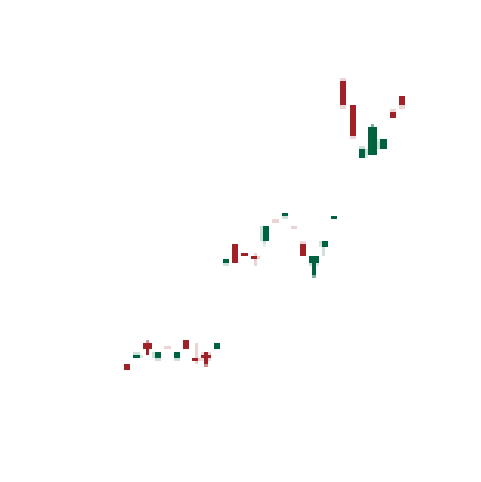

In [ ]:
print('實際結果：', '漲' if test_labels[0] == 1 else '跌') # 實際邊謙 0 為跌 1 為漲
print('預測結果：', '漲' if predictions[0] > 0.5 else '跌') # Sigmoid 0.5 為閾值

plt.figure(figsize=(15, 6))
plt.imshow(test_images[0])
plt.axis('off')
plt.show()